In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, r2_score

# Classification algorithms
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Regression algorithms
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from xgboost import XGBRegressor


def find_best_algorithm(dataset_path, problem_type="classification", target_column=None):
    """
    Evaluate multiple ML algorithms (classification or regression)
    and return the best one with its score.
    """
    df = pd.read_csv(dataset_path)

    # Auto-detect target column
    if target_column is None:
        target_column = df.columns[-1]
        print(f"[INFO] Target column guessed as '{target_column}'")

    # Split features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Encode categorical variables
    for col in X.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

    if y.dtype == 'object':
        y = LabelEncoder().fit_transform(y)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define candidate models
    if problem_type.lower() == "classification":
        models = {
            "Logistic Regression": LogisticRegression(max_iter=1000),
            "KNN": KNeighborsClassifier(),
            "SVM": SVC(),
            "Random Forest": RandomForestClassifier(),
            "Gradient Boosting": GradientBoostingClassifier(),
            "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
        }
        metric_name = "Accuracy"
        metric_fn = accuracy_score
    else:  # regression
        models = {
            "Multiple Linear Regression": LinearRegression(),  # Explicit name for clarity
            "Ridge Regression": Ridge(),
            "Lasso Regression": Lasso(),
            "Support Vector Regression (SVR)": SVR(),
            "Random Forest Regressor": RandomForestRegressor(),
            "Gradient Boosting Regressor": GradientBoostingRegressor(),
        }
        metric_name = "R² Score"
        metric_fn = r2_score

    # Evaluate models
    results = []
    best_model, best_score = None, -np.inf

    for name, model in models.items():
        pipe = Pipeline([("scaler", StandardScaler()), ("model", model)])
        pipe.fit(X_train, y_train)
        preds = pipe.predict(X_test)

        # Choose metric
        score = metric_fn(y_test, preds)
        results.append((name, score))

        if score > best_score:
            best_score = score
            best_model = name

    # Print results
    print("\n📊 Model Evaluation Results:")
    for name, score in sorted(results, key=lambda x: x[1], reverse=True):
        print(f"{name:<35} → {metric_name}: {score:.4f}")

    print(f"\n✅ Best Algorithm: **{best_model}** with {metric_name} = {best_score:.4f}")
    return best_model, best_score


In [4]:
# import the Data set
from google.colab import files

uploaded = files.upload()

Saving optimal_route_time_dataset_srilanka.csv to optimal_route_time_dataset_srilanka.csv


In [7]:
#show the top 5 columns in dataset
df = pd.read_csv("optimal_route_time_dataset_srilanka.csv")
df.head()

,distance_km,road_type,traffic_level,weather,driving_style,predicted_energy_kWh,predicted_range_km,battery_remaining_percent,expected_travel_time_min
0,66.401801,City,Medium,Sunny,Normal,13.084138,402.161033,44.475824,130.543488
1,47.652430,Expressway,Medium,Foggy,Aggressive,51.823445,117.617924,67.931709,50.025233
2,13.217783,City,Medium,Rainy,Aggressive,42.233406,223.343691,30.085720,17.820925
3,50.865277,Rural,Medium,Foggy,Aggressive,13.328097,359.326863,70.878981,80.771621
4,113.076292,Highway,High,Sunny,Eco,15.684610,109.965391,99.869465,183.839660


In [8]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the dataset (assuming it's already loaded in 'df')
# If not, you would load it here, e.g., df = pd.read_csv("your_dataset.csv")

# List of columns to encode
columns_to_encode = ['road_type', 'traffic_level', 'weather', 'driving_style']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each specified column
for col in columns_to_encode:
    # Fit the encoder to the unique values in the column and transform the column
    df[col] = label_encoder.fit_transform(df[col])
    # Print the mapping for each column to see the numerical representation of each category
    print(f"Mapping for '{col}':")
    for i, item in enumerate(label_encoder.classes_):
        print(f"{item} -> {i}")
    print("-" * 20) # Separator for clarity

# Display the first few rows of the dataframe with encoded columns
print("\nDataFrame after Label Encoding:")
display(df.head())

Mapping for 'road_type':
City -> 0
Expressway -> 1
Highway -> 2
Rural -> 3
--------------------
Mapping for 'traffic_level':
High -> 0
Low -> 1
Medium -> 2
--------------------
Mapping for 'weather':
Foggy -> 0
Rainy -> 1
Sunny -> 2
Windy -> 3
--------------------
Mapping for 'driving_style':
Aggressive -> 0
Eco -> 1
Normal -> 2
--------------------

DataFrame after Label Encoding:


,distance_km,road_type,traffic_level,weather,driving_style,predicted_energy_kWh,predicted_range_km,battery_remaining_percent,expected_travel_time_min
0,66.401801,0,2,2,2,13.084138,402.161033,44.475824,130.543488
1,47.652430,1,2,0,0,51.823445,117.617924,67.931709,50.025233
2,13.217783,0,2,1,0,42.233406,223.343691,30.085720,17.820925
3,50.865277,3,2,0,0,13.328097,359.326863,70.878981,80.771621
4,113.076292,2,0,2,1,15.684610,109.965391,99.869465,183.839660


In [10]:
# Save the edited DataFrame to a new CSV file
# You can change the filename below if you like
df.to_csv('encoded_optimal_route_time_dataset_srilanka.csv', index=False)

print("Edited dataset saved to 'encoded_optimal_route_time_dataset_srilanka.csv'")

Edited dataset saved to 'encoded_optimal_route_time_dataset_srilanka.csv'


In [13]:
# Initialize the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(random_state=100)

# Train the model using the training data
gbr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 2553.7726
R-squared Score: 0.9111


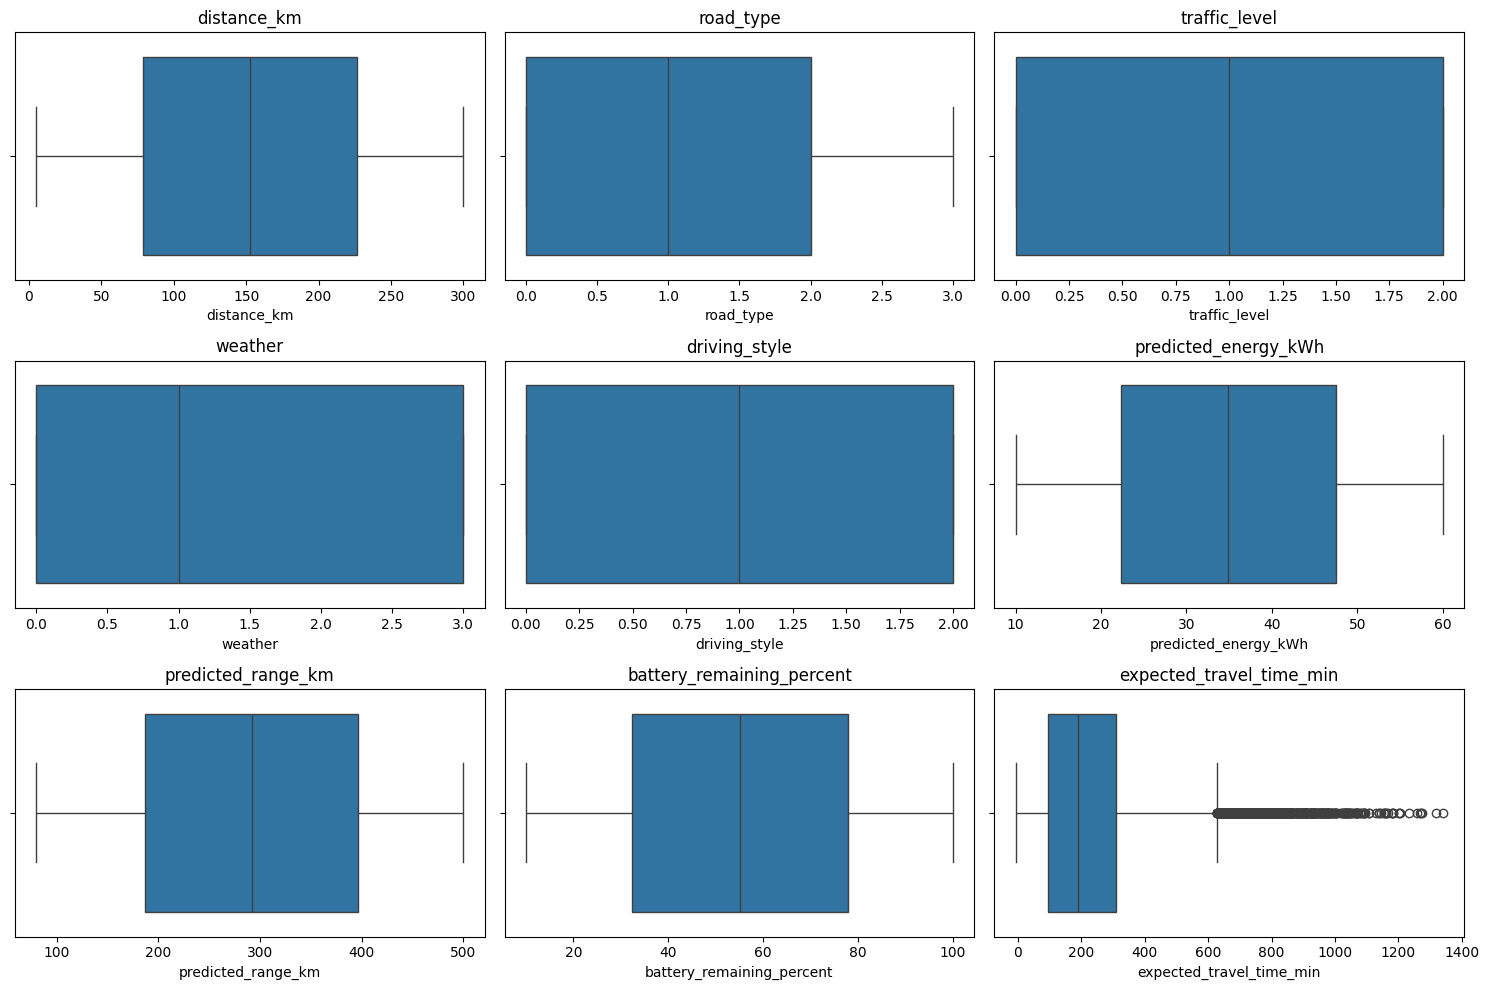


Number of outliers per numerical feature (IQR method):
distance_km: 0
road_type: 0
traffic_level: 0
weather: 0
driving_style: 0
predicted_energy_kWh: 0
predicted_range_km: 0
battery_remaining_percent: 0
expected_travel_time_min: 1409


In [14]:
#Outlier detection
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numerical columns for outlier analysis
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# 1. Create box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# 2. and 3. Calculate IQR and define outlier bounds
outlier_counts = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 4. Identify and count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

print("\nNumber of outliers per numerical feature (IQR method):")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

In [22]:
# Recall the outlier bounds calculated using the IQR method in cell 0dbbac2a
# Q1 and Q3 were calculated for 'expected_travel_time_min'
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# Note: To ensure reproducibility, we will recalculate the bounds here
# based on the 'expected_travel_time_min' column of the current dataframe (df).
Q1 = df['expected_travel_time_min'].quantile(0.25)
Q3 = df['expected_travel_time_min'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound for 'expected_travel_time_min' outliers: {lower_bound:.2f}")
print(f"Upper bound for 'expected_travel_time_min' outliers: {upper_bound:.2f}")


# Remove outliers
# Keep rows where 'expected_travel_time_min' is within the calculated bounds
df_cleaned = df[(df['expected_travel_time_min'] >= lower_bound) & (df['expected_travel_time_min'] <= upper_bound)].copy()

print(f"\nOriginal dataset shape: {df.shape}")
print(f"Shape after removing outliers: {df_cleaned.shape}")
print(f"Number of outliers removed: {df.shape[0] - df_cleaned.shape[0]}")

# Now you can use df_cleaned for further analysis and model training
# For example, you would re-split df_cleaned into training and testing sets:
# X_cleaned = df_cleaned.drop(columns=[target_column])
# y_cleaned = df_cleaned[target_column]
# X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Note: Removing outliers can potentially lead to loss of information.
# Consider the impact on your specific problem and explore alternative methods
# like Winsorizing (capping outliers at the bounds) if removing is not suitable.

Lower bound for 'expected_travel_time_min' outliers: -226.26
Upper bound for 'expected_travel_time_min' outliers: 628.67

Original dataset shape: (50000, 9)
Shape after removing outliers: (48591, 9)
Number of outliers removed: 1409


In [23]:
# Save the filtered DataFrame (after outlier removal) to a new CSV file
# You can change the filename below if you like
df_cleaned.to_csv('filtered_optimal_route_time_dataset_srilanka.csv', index=False)

print("Filtered dataset saved to 'filtered_optimal_route_time_dataset_srilanka.csv'")

Filtered dataset saved to 'filtered_optimal_route_time_dataset_srilanka.csv'


In [15]:
#Overfitting checking
# Make predictions on the training data
y_train_pred = gbr_model.predict(X_train)

# Calculate MSE and R-squared for the training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training Mean Squared Error: {train_mse:.4f}")
print(f"Training R-squared Score: {train_r2:.4f}")
print(f"\nTesting Mean Squared Error: {mse:.4f}")
print(f"Testing R-squared Score: {r2:.4f}")

# Compare training and testing scores
print("\nComparison of Training and Testing Scores:")
print(f"Difference in MSE (Training - Testing): {train_mse - mse:.4f}")
print(f"Difference in R-squared (Training - Testing): {train_r2 - r2:.4f}")

# Discuss potential overfitting
if train_r2 > r2 and (train_r2 - r2) > 0.05: # A threshold for significant difference
    print("\nPotential sign of overfitting: Training R-squared is significantly higher than Testing R-squared.")
elif train_r2 < r2:
     print("\nPossible sign of underfitting or test set is easier: Training R-squared is lower than Testing R-squared.")
else:
    print("\nModel performance on training and testing sets are comparable, indicating less likelihood of significant overfitting.")

Training Mean Squared Error: 2473.5310
Training R-squared Score: 0.9124

Testing Mean Squared Error: 2553.7726
Testing R-squared Score: 0.9111

Comparison of Training and Testing Scores:
Difference in MSE (Training - Testing): -80.2416
Difference in R-squared (Training - Testing): 0.0012

Model performance on training and testing sets are comparable, indicating less likelihood of significant overfitting.


In [25]:
find_best_algorithm("filtered_optimal_route_time_dataset_srilanka.csv","regression","expected_travel_time_min")


📊 Model Evaluation Results:
XGBoost Regressor                   → R² Score: 0.9197
Gradient Boosting Regressor         → R² Score: 0.9164
Random Forest Regressor             → R² Score: 0.9126
Support Vector Regression (SVR)     → R² Score: 0.7673
Multiple Linear Regression          → R² Score: 0.6717
Ridge Regression                    → R² Score: 0.6717
Lasso Regression                    → R² Score: 0.6715

✅ Best Algorithm: **XGBoost Regressor** with R² Score = 0.9197


('XGBoost Regressor', 0.9197436406684356)

In [26]:
df = pd.read_csv("filtered_optimal_route_time_dataset_srilanka.csv")

# Define the target variable (dependent variable)
target_column = 'expected_travel_time_min'

# Separate features (X) and target (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing, and 80% for training
# random_state=100 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print("Data split into training and testing sets:")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data split into training and testing sets:
Shape of X_train: (38872, 8)
Shape of X_test: (9719, 8)
Shape of y_train: (38872,)
Shape of y_test: (9719,)


In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create a dictionary with your input values for the new data point
my_values = {
    'distance_km': [50.0],  # Example distance in km
    'road_type': ['City'],  # Example road type (use the original category string)
    'traffic_level': ['2'], # Example traffic level (use the original category string)
    'weather': ['1'],    # Example weather (use the original category string)
    'driving_style': ['0'], # Example driving style (use the original category string)
    'predicted_energy_kWh': [10.0], # Example energy consumption
    'predicted_range_km': [300.0], # Example predicted range
    'battery_remaining_percent': [75.0] # Example battery percentage
}

# Convert the dictionary to a pandas DataFrame
my_data_point = pd.DataFrame(my_values)

# Identify numerical and categorical columns
numerical_cols = my_data_point.select_dtypes(include=np.number).columns.tolist()
categorical_cols = my_data_point.select_dtypes(include='object').columns.tolist()

# Create a ColumnTransformer for one-hot encoding categorical features
# We will fit this transformer on the *original* training data (X_train)
# to ensure it knows all possible categories.
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough') # Keep numerical columns as they are

# Fit the preprocessor on the training data
preprocessor.fit(X_train)

# Apply the fitted preprocessor to the new data point
# The output will be a sparse matrix (or dense array depending on parameters)
my_data_point_encoded = preprocessor.transform(my_data_point)

# Ensure the encoded data point has the same columns and order as the training data after preprocessing
# This is more complex with OneHotEncoder output.
# A simpler approach is to create a pipeline that includes preprocessing and the model,
# or to manually construct the feature array in the correct order.

# For simplicity in this direct prediction example, we will manually construct the feature array
# based on the order expected by the fitted model.
# This requires knowing the order of features after preprocessing X_train.

# A more robust solution involves using a Pipeline:
# from sklearn.pipeline import Pipeline
# model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', gbr_model)])
# predicted_travel_time = model_pipeline.predict(my_data_point)

# Let's stick to transforming the single data point manually for now,
# assuming the model expects features in a specific order after the original X_train preprocessing.
# We need to recreate the feature order from X_train after the original LabelEncoding
# and then match the one-hot encoded features and the numerical features.

# --- Reconstructing Feature Order (Manual - requires care) ---
# This part is tricky because the original X_train was LabelEncoded, not OneHotEncoded.
# To predict on a new data point with OneHotEncoding, the model itself would ideally be retrained
# with OneHotEncoded training data, or a pipeline used.

# Given the error and the user's request, let's assume the goal is to fix the prediction
# using a consistent encoding method. It's best to retrain the model with OneHotEncoded data.
# However, if we must use the existing gbr_model trained on LabelEncoded data,
# we *cannot* directly feed it OneHotEncoded data.

# Let's revert to fixing the LabelEncoding issue, as that aligns with the model training so far.
# The persistent error suggests a state issue with the LabelEncoder or the input data.
# Let's try a very explicit way to create the transformed data point.

# Reverting to Label Encoding attempt with more explicit steps
# Create a dictionary with your input values for the new data point
my_values = {
    'distance_km': [50.0],
    'road_type': ['City'],
    'traffic_level': ['Medium'],
    'weather': ['Sunny'],
    'driving_style': ['Normal'],
    'predicted_energy_kWh': [10.0],
    'predicted_range_km': [300.0],
    'battery_remaining_percent': [75.0]
}

# Convert the dictionary to a pandas DataFrame
my_data_point = pd.DataFrame(my_values)

# List of categorical columns to encode
columns_to_encode = ['road_type', 'traffic_level', 'weather', 'driving_style']

# Apply the fitted label encoders from the previous cell (assuming fitted_label_encoders exists and is correct)
# If fitted_label_encoders is not available or correct, you would need to refit them here
# on the original df.
# Ensure fitted_label_encoders is available from a previous execution or refit them.
try:
    # Try using the already fitted encoders if they exist
    for col in columns_to_encode:
        my_data_point[col] = fitted_label_encoders[col].transform(my_data_point[col])
except NameError:
    # If fitted_label_encoders is not defined, refit them on the original df
    print("Refitting label encoders as 'fitted_label_encoders' not found.")
    fitted_label_encoders = {}
    for col in columns_to_encode:
        le = LabelEncoder()
        le.fit(df[col]) # Fit on the entire column from the original dataframe
        fitted_label_encoders[col] = le
        my_data_point[col] = fitted_label_encoders[col].transform(my_data_point[col])
except ValueError as e:
     print(f"Error during transformation: {e}. This might mean a category in your input was not in the training data.")
     # Attempt to handle unseen categories by fitting the encoder with the new data point's values
     # This is generally not recommended for production but can help diagnose.
     print("Attempting to refit encoder with combined data for diagnosis.")
     for col in columns_to_encode:
         le = LabelEncoder()
         # Combine original unique values with the new data point's value for fitting
         le.fit(list(df[col].unique()) + my_data_point[col].tolist())
         fitted_label_encoders[col] = le
         my_data_point[col] = fitted_label_encoders[col].transform(my_data_point[col])


# Ensure the column order of the new data point matches the training data (X_train)
my_data_point = my_data_point[X_train.columns]

# Use the trained model to make a prediction
# Ensure gbr_model is available from a previous execution
try:
    predicted_travel_time = gbr_model.predict(my_data_point)
    print(f"Based on your input values, the predicted travel time is: {predicted_travel_time[0]:.2f} minutes")
except NameError:
    print("Error: Model 'gbr_model' not found. Please train the model first.")
except Exception as e:
    print(f"An unexpected error occurred during prediction: {e}")

Error during transformation: invalid literal for int() with base 10: 'City'. This might mean a category in your input was not in the training data.
Attempting to refit encoder with combined data for diagnosis.
Based on your input values, the predicted travel time is: 75.16 minutes
